# Exploring Vancouvers Street Trees 

#### By: Nava Meadi, Owen Coelho, Myles Taillefer

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://dpdajlq3ew794.cloudfront.net/20210310131419/shutterstock_1682253904.jpg?format=auto&width=900", width=700, height=333)

### Where we pulled out data

We obtained our data from [Vancouver Open Data](https://opendata.vancouver.ca/explore/dataset/street-trees/export/?disjunctive.species_name&disjunctive.common_name&disjunctive.on_street&disjunctive.neighbourhood_name&location=14,49.26206,-123.1615). 

The street tree dataset includes public trees on boulevards and provides data on tree coordinates, species and other related characteristics. Park trees and private trees are not included in the inventory.

Here is an overview of all the columns and their descriptions. Next we will be exploring the data and seeing which columns are usable for our analysis.

Nava, Owen and Myles


| Column                                  | Description                        |
|-----------------------------------------|:-----------------------------------|
| <font color='blue'>**std_name**</font>        | This is the street the tree is on in Vancouver |
| <font color='blue'>**on_street**</font> | This is the street the tree is on in Vancouver|
| <font color='blue'>**species_name**</font> | The scientific name of the species name|
| <font color='blue'>**neighbourhood_name**</font>        | The general area the tree is in |
| <font color='blue'>**date_planted**</font>        | The date the tree was planted |
| <font color='blue'>**diameter**</font>        | The diameter of the base of the tree |
| <font color='blue'>**street_side_name**</font>        | If the `street_name` is even or odd |
| <font color='blue'>**genus_name**</font>        | The genus name |
| <font color='blue'>**assigned**</font>        | If the tree is assigned or not |
| <font color='blue'>**civic_number**</font>        | The tree's civic number for records |
| <font color='blue'>**plant_area**</font>        | The plant area |
| <font color='blue'>**curb**</font>        | If it's planted on a curb |
| <font color='blue'>**tree_id**</font>        | The tree's ID |
| <font color='blue'>**common_name**</font>        | The tree's common name |
| <font color='blue'>**height_range**</font>        | A scale of height range |
| <font color='blue'>**on_street_block**</font>        | Which block the tree is on |
| <font color='blue'>**cultivar_name**</font>        | The name of the person who planted the tree |
| <font color='blue'>**root_barrier**</font>        | Whether or not the tree has a root barrier|
| <font color='blue'>**Geom**</font>        |  Spatial representation of feature |
| <font color='blue'>**geo_point_2d**</font>        | The 2D points in latitude and longitude |



## Exploring the Data:

Here we will being diving into our data more. We will look at the details of each columns 

Work done by: Owen, Nava and Myles

In [2]:
#Load all libraries
import pandas as pd
import numpy as np
import random
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

In [3]:
#Loading in our dataset 
df = pd.read_csv("street-trees.csv", on_bad_lines='skip', sep = ';')
df.head()

,TREE_ID,CIVIC_NUMBER,STD_STREET,GENUS_NAME,SPECIES_NAME,CULTIVAR_NAME,COMMON_NAME,ASSIGNED,ROOT_BARRIER,PLANT_AREA,ON_STREET_BLOCK,ON_STREET,NEIGHBOURHOOD_NAME,STREET_SIDE_NAME,HEIGHT_RANGE_ID,HEIGHT_RANGE,DIAMETER,CURB,DATE_PLANTED,Geom,geo_point_2d
0,3873,2103,E 5TH AV,TILIA,CORDATA,NaN,LITTLE-LEAF LINDEN,N,N,7,2100,E 5TH AV,GRANDVIEW-WOODLAND,ODD,5,50' - 60',17.5,Y,NaN,"{""coordinates"": [-123.061752, 49.265964], ""typ...","49.265964, -123.061752"
1,3874,2103,E 5TH AV,PRUNUS,SERRULATA,NaN,JAPANESE FLOWERING CHERRY,N,N,7,2000,LAKEWOOD ST,GRANDVIEW-WOODLAND,EVEN,2,20' - 30',16.0,Y,NaN,"{""coordinates"": [-123.061873, 49.266295], ""typ...","49.266295, -123.061873"
2,3875,2103,E 5TH AV,PRUNUS,SERRULATA,NaN,JAPANESE FLOWERING CHERRY,N,N,7,2000,LAKEWOOD ST,GRANDVIEW-WOODLAND,EVEN,3,30' - 40',27.0,Y,NaN,"{""coordinates"": [-123.061873, 49.266197], ""typ...","49.266197, -123.061873"
3,3876,2103,E 5TH AV,PRUNUS,SERRULATA,NaN,JAPANESE FLOWERING CHERRY,N,N,7,2000,LAKEWOOD ST,GRANDVIEW-WOODLAND,EVEN,3,30' - 40',24.0,Y,NaN,"{""coordinates"": [-123.06188, 49.266075], ""type...","49.266075, -123.06188"
4,3878,2109,E 5TH AV,TILIA,CORDATA,NaN,LITTLE-LEAF LINDEN,N,N,7,2100,E 5TH AV,GRANDVIEW-WOODLAND,ODD,6,60' - 70',18.0,Y,NaN,"{""coordinates"": [-123.061554, 49.265964], ""typ...","49.265964, -123.061554"


In [4]:
#Using the 'geo_point_2d' column and splitting it to get latitude and longitude for future visualizations
df[['latitude', 'longitude']] = df['geo_point_2d'].str.split(', ', expand=True)

df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])

df.head()

,TREE_ID,CIVIC_NUMBER,STD_STREET,GENUS_NAME,SPECIES_NAME,CULTIVAR_NAME,COMMON_NAME,ASSIGNED,ROOT_BARRIER,PLANT_AREA,ON_STREET_BLOCK,ON_STREET,NEIGHBOURHOOD_NAME,STREET_SIDE_NAME,HEIGHT_RANGE_ID,HEIGHT_RANGE,DIAMETER,CURB,DATE_PLANTED,Geom,geo_point_2d,latitude,longitude
0,3873,2103,E 5TH AV,TILIA,CORDATA,NaN,LITTLE-LEAF LINDEN,N,N,7,2100,E 5TH AV,GRANDVIEW-WOODLAND,ODD,5,50' - 60',17.5,Y,NaN,"{""coordinates"": [-123.061752, 49.265964], ""typ...","49.265964, -123.061752",49.265964,-123.061752
1,3874,2103,E 5TH AV,PRUNUS,SERRULATA,NaN,JAPANESE FLOWERING CHERRY,N,N,7,2000,LAKEWOOD ST,GRANDVIEW-WOODLAND,EVEN,2,20' - 30',16.0,Y,NaN,"{""coordinates"": [-123.061873, 49.266295], ""typ...","49.266295, -123.061873",49.266295,-123.061873
2,3875,2103,E 5TH AV,PRUNUS,SERRULATA,NaN,JAPANESE FLOWERING CHERRY,N,N,7,2000,LAKEWOOD ST,GRANDVIEW-WOODLAND,EVEN,3,30' - 40',27.0,Y,NaN,"{""coordinates"": [-123.061873, 49.266197], ""typ...","49.266197, -123.061873",49.266197,-123.061873
3,3876,2103,E 5TH AV,PRUNUS,SERRULATA,NaN,JAPANESE FLOWERING CHERRY,N,N,7,2000,LAKEWOOD ST,GRANDVIEW-WOODLAND,EVEN,3,30' - 40',24.0,Y,NaN,"{""coordinates"": [-123.06188, 49.266075], ""type...","49.266075, -123.06188",49.266075,-123.061880
4,3878,2109,E 5TH AV,TILIA,CORDATA,NaN,LITTLE-LEAF LINDEN,N,N,7,2100,E 5TH AV,GRANDVIEW-WOODLAND,ODD,6,60' - 70',18.0,Y,NaN,"{""coordinates"": [-123.061554, 49.265964], ""typ...","49.265964, -123.061554",49.265964,-123.061554


In [5]:
#Our dataframe is 151954 rows and 23 columns
df.shape

(151952, 23)

In [6]:
#As we can see, we have lots of columns with NaN data. (where Non-Null < # of rows)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151952 entries, 0 to 151951
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TREE_ID             151952 non-null  int64  
 1   CIVIC_NUMBER        151952 non-null  int64  
 2   STD_STREET          151952 non-null  object 
 3   GENUS_NAME          151952 non-null  object 
 4   SPECIES_NAME        151952 non-null  object 
 5   CULTIVAR_NAME       80752 non-null   object 
 6   COMMON_NAME         151952 non-null  object 
 7   ASSIGNED            151952 non-null  object 
 8   ROOT_BARRIER        151952 non-null  object 
 9   PLANT_AREA          150519 non-null  object 
 10  ON_STREET_BLOCK     151952 non-null  int64  
 11  ON_STREET           151952 non-null  object 
 12  NEIGHBOURHOOD_NAME  151952 non-null  object 
 13  STREET_SIDE_NAME    151952 non-null  object 
 14  HEIGHT_RANGE_ID     151952 non-null  int64  
 15  HEIGHT_RANGE        151952 non-nul

In [7]:
#These are the neighbourhoods we're interested in 
df['NEIGHBOURHOOD_NAME'].value_counts()

NEIGHBOURHOOD_NAME
RENFREW-COLLINGWOOD         11885
KENSINGTON-CEDAR COTTAGE    11548
HASTINGS-SUNRISE            10686
DUNBAR-SOUTHLANDS            9504
SUNSET                       8789
KITSILANO                    8285
VICTORIA-FRASERVIEW          8173
RILEY PARK                   7339
MOUNT PLEASANT               7071
KERRISDALE                   7008
GRANDVIEW-WOODLAND           6986
SHAUGHNESSY                  6916
KILLARNEY                    6882
MARPOLE                      6667
DOWNTOWN                     5386
ARBUTUS RIDGE                5203
OAKRIDGE                     4962
WEST POINT GREY              4764
FAIRVIEW                     4203
WEST END                     3504
SOUTH CAMBIE                 3485
STRATHCONA                   2706
Name: count, dtype: int64

## Refining the dataset. 
### The dataset contains many columns that we are not interested in analysing. To make the dataset easier to work with, we will be dropping a few. 


In [8]:
#We noticed we have two columns with very similar information. Are they the same? No. 
df['STD_STREET'].equals(df['ON_STREET'])

False

In [9]:
#Make all columns lower case
df.columns = df.columns.str.lower()

#Drop non-needed columns
df = df.drop(columns=["cultivar_name","assigned","std_street","on_street","height_range_id","tree_id","civic_number","street_side_name", "geo_point_2d"])

### Visualizing the Top `10` Trees In Each Neighbourhood in Vancouver

Here we can select the neighbourhood of interest using our dropdown bar. This visual is great for getting a sense of the top trees but what is the commonality between all of them? 

From here we will Aggregate data to count occurrences of each 'common_name' within each 'neighbourhood_name', find global top 10 common names and plot.

Work done by: Nava, Myles, Owen

In [10]:
#There are 684 species of tree on this dataset. It will be difficult to visualize cleanly, so we will 
#be ignoring some.  
len(df['common_name'].unique())

684

In [11]:
df['common_name'].value_counts()

common_name
KWANZAN FLOWERING CHERRY       10073
PISSARD PLUM                    7549
NORWAY MAPLE                    5658
CRIMEAN LINDEN                  4229
PYRAMIDAL EUROPEAN HORNBEAM     3465
                               ...  
PURPLE GIANT FILBERT               1
JADE GREEN NORWAY MAPLE            1
WEEPING GOLDENCHAIN                1
CHINESE BIRCH                      1
SHAGBARK HICKORY                   1
Name: count, Length: 684, dtype: int64

In [12]:
#As we can see there is roughly 11 thousand trees that occur only less than 100 times so we will focus
#on the top 10 trees.
less_than_100_trees = df[df['common_name'].isin(df['common_name'].value_counts()[df['common_name'].value_counts() < 100].index)]
len(less_than_100_trees)

11149

In [13]:
#The top 10 common name trees we're interested in
df['common_name'].value_counts().nlargest(10) 

common_name
KWANZAN FLOWERING CHERRY       10073
PISSARD PLUM                    7549
NORWAY MAPLE                    5658
CRIMEAN LINDEN                  4229
PYRAMIDAL EUROPEAN HORNBEAM     3465
NIGHT PURPLE LEAF PLUM          3180
RED MAPLE                       3060
KOBUS MAGNOLIA                  2697
BOWHALL RED MAPLE               2622
AKEBONO FLOWERING CHERRY        2426
Name: count, dtype: int64

In [14]:
#Now taking a look at NaN values
nan_count = df.isna().sum()
print(nan_count)

genus_name                0
species_name              0
common_name               0
root_barrier              0
plant_area             1433
on_street_block           0
neighbourhood_name        0
height_range              0
diameter                  0
curb                      0
date_planted          77695
geom                   6302
latitude               6302
longitude              6302
dtype: int64


In [15]:
df.head()

,genus_name,species_name,common_name,root_barrier,plant_area,on_street_block,neighbourhood_name,height_range,diameter,curb,date_planted,geom,latitude,longitude
0,TILIA,CORDATA,LITTLE-LEAF LINDEN,N,7,2100,GRANDVIEW-WOODLAND,50' - 60',17.5,Y,NaN,"{""coordinates"": [-123.061752, 49.265964], ""typ...",49.265964,-123.061752
1,PRUNUS,SERRULATA,JAPANESE FLOWERING CHERRY,N,7,2000,GRANDVIEW-WOODLAND,20' - 30',16.0,Y,NaN,"{""coordinates"": [-123.061873, 49.266295], ""typ...",49.266295,-123.061873
2,PRUNUS,SERRULATA,JAPANESE FLOWERING CHERRY,N,7,2000,GRANDVIEW-WOODLAND,30' - 40',27.0,Y,NaN,"{""coordinates"": [-123.061873, 49.266197], ""typ...",49.266197,-123.061873
3,PRUNUS,SERRULATA,JAPANESE FLOWERING CHERRY,N,7,2000,GRANDVIEW-WOODLAND,30' - 40',24.0,Y,NaN,"{""coordinates"": [-123.06188, 49.266075], ""type...",49.266075,-123.061880
4,TILIA,CORDATA,LITTLE-LEAF LINDEN,N,7,2100,GRANDVIEW-WOODLAND,60' - 70',18.0,Y,NaN,"{""coordinates"": [-123.061554, 49.265964], ""typ...",49.265964,-123.061554


Dropdown(description='Neighbourhood:', index=10, options=('GRANDVIEW-WOODLAND', 'HASTINGS-SUNRISE', 'KENSINGTO…

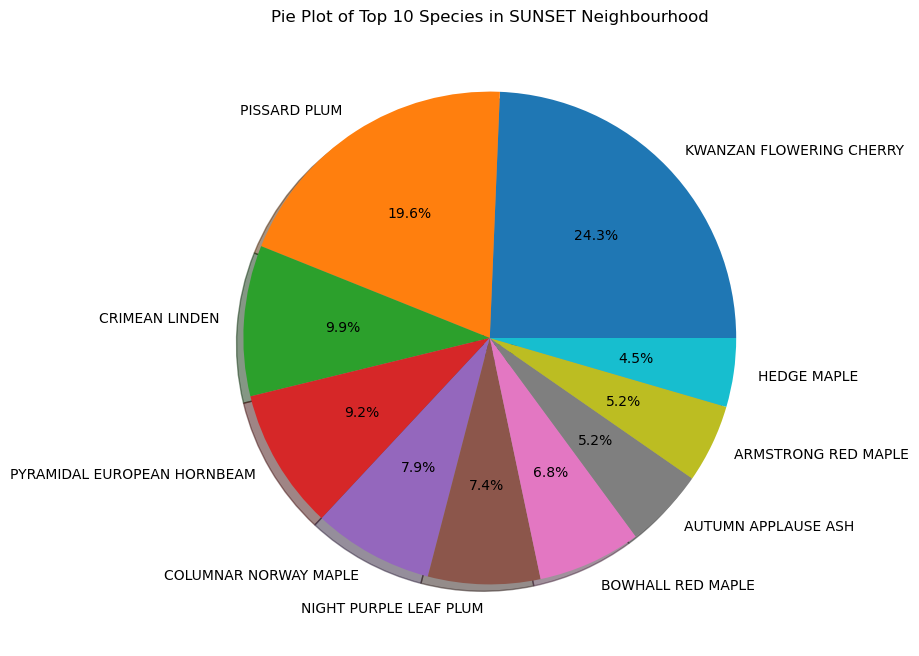

In [16]:
# Create a dropdown 
neighbourhoods = df['neighbourhood_name'].unique()
dropdown = widgets.Dropdown(options=neighbourhoods, description='Neighbourhood:', value='SUNSET')  # Default to SUNSET

def update_plot(neighbourhood):
    clear_output(wait=True)  # Clear the previous plot
    display(dropdown)  # Redisplay the dropdown
    # Group by common_name for the selected neighbourhood
    neighbourhood_commonName = df[df["neighbourhood_name"]==neighbourhood].groupby("common_name").count()
    # Get top 10
    neighbourhood_top10 = neighbourhood_commonName.sort_values(by='genus_name',ascending=False).head(10)
    
    # Plot
    plt.figure(figsize=(8,8))
    plt.pie(neighbourhood_top10["species_name"], labels=neighbourhood_top10.index, autopct='%1.1f%%', shadow=True)
    plt.title(f'Pie Plot of Top 10 Species in {neighbourhood} Neighbourhood')
    plt.show()

display(dropdown)
update_plot(dropdown.value)
dropdown.observe(lambda change: update_plot(change['new']), names='value')


In [17]:
#Now we will visualize the top 10 trees accross all neighbourhoods 

#First we must group the trees by neighbourhood and species
grouped_df = df.groupby(['neighbourhood_name', 'common_name']).size().reset_index(name='count')
grouped_df

,neighbourhood_name,common_name,count
0,ARBUTUS RIDGE,ACCOLADE CHERRY,1
1,ARBUTUS RIDGE,AKEBONO FLOWERING CHERRY,61
2,ARBUTUS RIDGE,ALDER SPECIES,1
3,ARBUTUS RIDGE,ALDERLEAFED MOUNTAIN ASH,8
4,ARBUTUS RIDGE,ALIA'S MAGNOLIA,2
...,...,...,...
6622,WEST POINT GREY,WORPLESDON SWEETGUM,49
6623,WEST POINT GREY,YELLOW BUCKEYE,2
6624,WEST POINT GREY,YELLOWWOOD,1
6625,WEST POINT GREY,YOSHINO CHERRY,2


In [18]:
#Selecting the 10 most common trees
global_top10 = grouped_df.groupby('common_name')['count'].sum().nlargest(10).index
global_top10

Index(['KWANZAN FLOWERING CHERRY', 'PISSARD PLUM', 'NORWAY MAPLE',
       'CRIMEAN LINDEN', 'PYRAMIDAL EUROPEAN HORNBEAM',
       'NIGHT PURPLE LEAF PLUM', 'RED MAPLE', 'KOBUS MAGNOLIA',
       'BOWHALL RED MAPLE', 'AKEBONO FLOWERING CHERRY'],
      dtype='object', name='common_name')

In [19]:
#Subsetting the dataframe to only consider the most common trees
top10_df = grouped_df[grouped_df['common_name'].isin(global_top10)]
top10_df

,neighbourhood_name,common_name,count
1,ARBUTUS RIDGE,AKEBONO FLOWERING CHERRY,61
35,ARBUTUS RIDGE,BOWHALL RED MAPLE,109
62,ARBUTUS RIDGE,CRIMEAN LINDEN,55
136,ARBUTUS RIDGE,KOBUS MAGNOLIA,146
139,ARBUTUS RIDGE,KWANZAN FLOWERING CHERRY,356
...,...,...,...
6498,WEST POINT GREY,NIGHT PURPLE LEAF PLUM,87
6502,WEST POINT GREY,NORWAY MAPLE,342
6522,WEST POINT GREY,PISSARD PLUM,280
6535,WEST POINT GREY,PYRAMIDAL EUROPEAN HORNBEAM,17


In [20]:
# Since we're plotting for all neighborhoods, it's better to pivot the data
pivot_df = top10_df.pivot(index='common_name', columns='neighbourhood_name', values='count').fillna(0)
pivot_df

neighbourhood_name,ARBUTUS RIDGE,DOWNTOWN,DUNBAR-SOUTHLANDS,FAIRVIEW,GRANDVIEW-WOODLAND,HASTINGS-SUNRISE,KENSINGTON-CEDAR COTTAGE,KERRISDALE,KILLARNEY,KITSILANO,MARPOLE,MOUNT PLEASANT,OAKRIDGE,RENFREW-COLLINGWOOD,RILEY PARK,SHAUGHNESSY,SOUTH CAMBIE,STRATHCONA,SUNSET,VICTORIA-FRASERVIEW,WEST END,WEST POINT GREY
common_name,,,,,,,,,,,,,,,,,,,,,,
AKEBONO FLOWERING CHERRY,61.0,9.0,222.0,41.0,93.0,218.0,128.0,157.0,49.0,91.0,201.0,63.0,67.0,349.0,138.0,82.0,72.0,32.0,117.0,109.0,32.0,95.0
BOWHALL RED MAPLE,109.0,193.0,113.0,108.0,125.0,205.0,226.0,69.0,149.0,70.0,76.0,127.0,32.0,273.0,65.0,51.0,82.0,114.0,212.0,98.0,88.0,37.0
CRIMEAN LINDEN,55.0,154.0,69.0,91.0,186.0,241.0,306.0,115.0,676.0,379.0,22.0,212.0,37.0,348.0,257.0,70.0,63.0,72.0,309.0,386.0,96.0,85.0
KOBUS MAGNOLIA,146.0,38.0,52.0,14.0,85.0,240.0,262.0,213.0,134.0,280.0,75.0,36.0,139.0,287.0,153.0,111.0,54.0,10.0,47.0,248.0,9.0,64.0
KWANZAN FLOWERING CHERRY,356.0,55.0,716.0,230.0,436.0,365.0,722.0,542.0,359.0,456.0,576.0,716.0,480.0,811.0,651.0,357.0,240.0,102.0,761.0,718.0,215.0,209.0
NIGHT PURPLE LEAF PLUM,182.0,0.0,325.0,31.0,46.0,294.0,162.0,133.0,192.0,126.0,178.0,8.0,179.0,246.0,186.0,154.0,78.0,4.0,230.0,302.0,37.0,87.0
NORWAY MAPLE,73.0,114.0,618.0,185.0,106.0,322.0,182.0,657.0,47.0,879.0,259.0,238.0,39.0,120.0,259.0,737.0,206.0,33.0,123.0,43.0,76.0,342.0
PISSARD PLUM,636.0,3.0,638.0,108.0,107.0,495.0,316.0,471.0,334.0,274.0,389.0,115.0,409.0,529.0,379.0,421.0,105.0,23.0,612.0,688.0,217.0,280.0
PYRAMIDAL EUROPEAN HORNBEAM,113.0,217.0,29.0,73.0,238.0,287.0,317.0,70.0,204.0,94.0,247.0,219.0,78.0,301.0,168.0,49.0,49.0,121.0,289.0,210.0,75.0,17.0


<Figure size 1400x800 with 0 Axes>

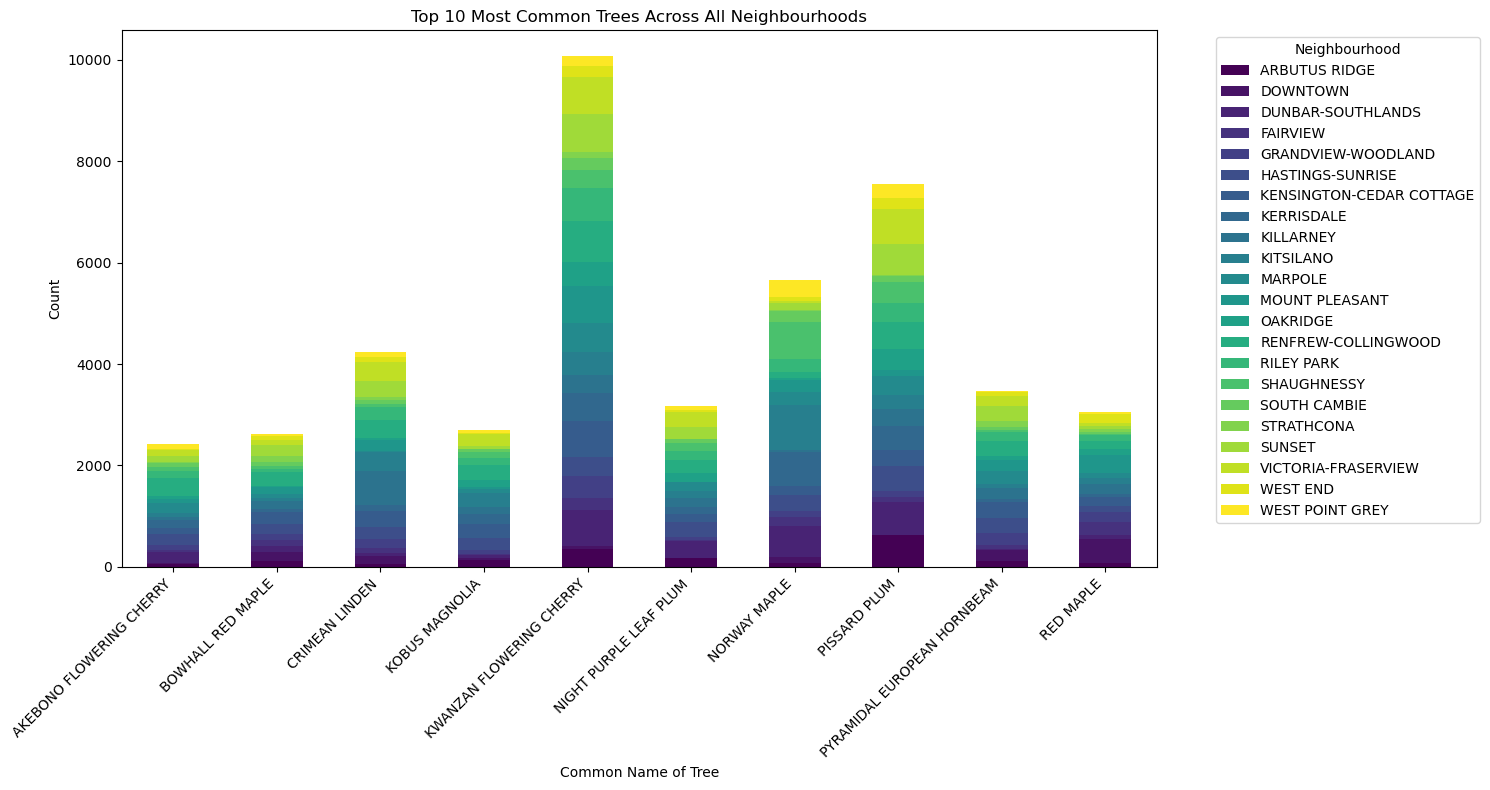

In [21]:
plt.figure(figsize=(14, 8))

# We will create a bar plot for each neighborhood in the pivot table
pivot_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 8))

#addding title
plt.title('Top 10 Most Common Trees Across All Neighbourhoods')

#adding labels
plt.xlabel('Common Name of Tree')
plt.ylabel('Count')

#adding ticks
plt.xticks(rotation=45, ha="right")

#adding legend
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')

#changing layout
plt.tight_layout()

plt.show()


#### Kwanza Flowering Cherry is the most significantly planted tree in Vancouver amoung all the neighbourhoods. 

Now keeping this in mind lets explore how many are planted in each neighbourhood.

In [22]:
#Comparing the counts of kwanzan flowering cherry trees between each neighbourhood

#grouping kfc trees by their neighbourhood and counting them
kwanzan_count_comparision = df[df["common_name"]=="KWANZAN FLOWERING CHERRY"].groupby("neighbourhood_name").size()
 
#getting the top 5 neighbourhoods for kfc trees
kwanzan_popular_neighbourhood = kwanzan_count_comparision.nlargest(5)
print(kwanzan_popular_neighbourhood)


neighbourhood_name
RENFREW-COLLINGWOOD         811
SUNSET                      761
KENSINGTON-CEDAR COTTAGE    722
VICTORIA-FRASERVIEW         718
DUNBAR-SOUTHLANDS           716
dtype: int64


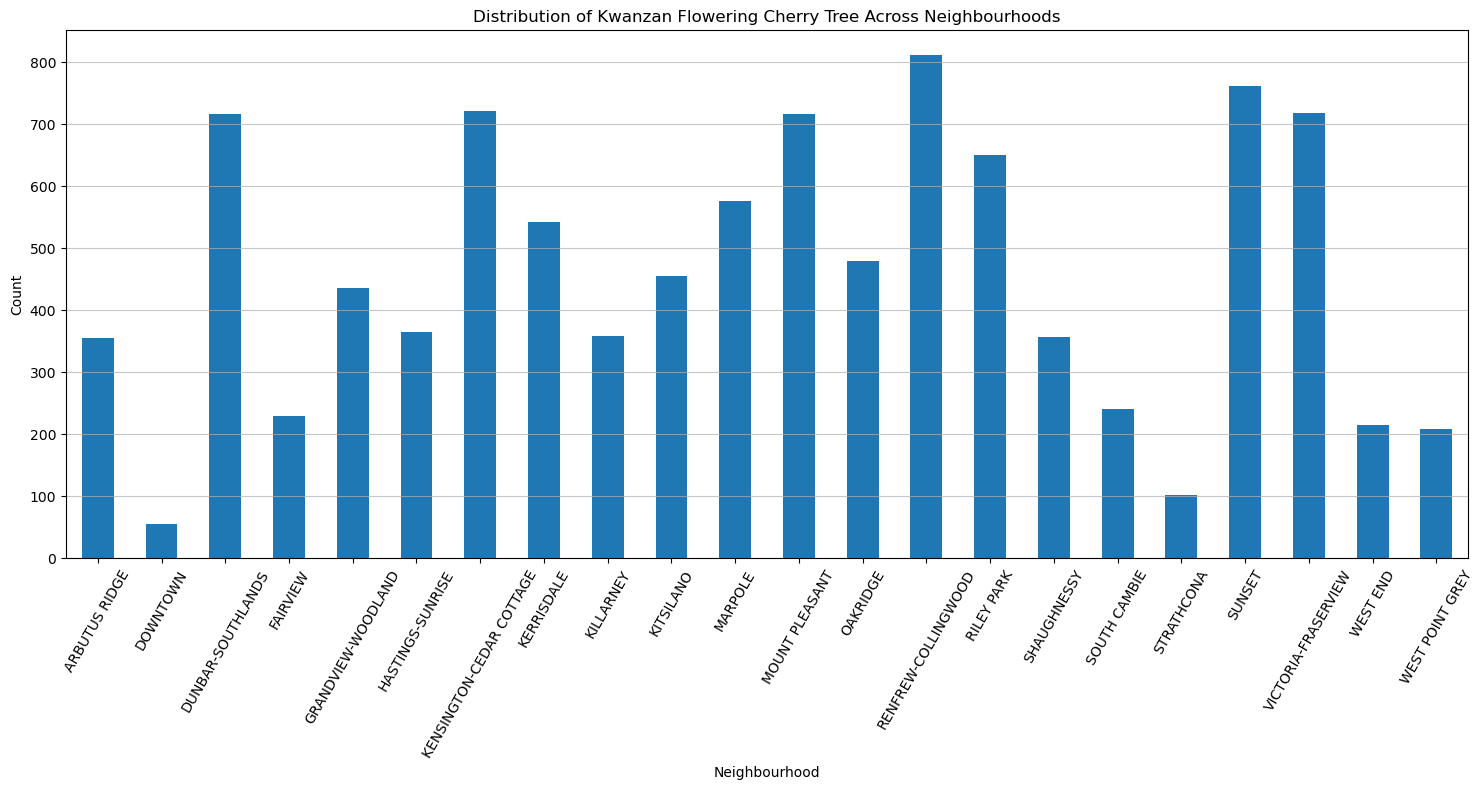

In [23]:
#Generating the plot

#create figure
plt.figure(figsize=(15,8))

#plot data on bars
kwanzan_count_comparision.plot(kind='bar')

#add title
plt.title("Distribution of Kwanzan Flowering Cherry Tree Across Neighbourhoods")

#add labels
plt.xlabel("Neighbourhood")
plt.ylabel("Count")

#add ticks and gridlines
plt.xticks(rotation=60)
plt.grid(axis='y',alpha=0.7)

#change layout
plt.tight_layout()

plt.show()

### Finding the tallest tree within each neighbourhood

In [28]:
# Example preprocessing step if 'height_range' is in the format 'min-max' (e.g., '10'-20').
df['max_height'] = df['height_range'].str.split(' - ').str[1].str.replace("'", "").astype(float)
df.head()

,genus_name,species_name,common_name,root_barrier,plant_area,on_street_block,neighbourhood_name,height_range,diameter,curb,date_planted,geom,latitude,longitude,max_height
0,TILIA,CORDATA,LITTLE-LEAF LINDEN,N,7,2100,GRANDVIEW-WOODLAND,50' - 60',17.5,Y,NaN,"{""coordinates"": [-123.061752, 49.265964], ""typ...",49.265964,-123.061752,60.0
1,PRUNUS,SERRULATA,JAPANESE FLOWERING CHERRY,N,7,2000,GRANDVIEW-WOODLAND,20' - 30',16.0,Y,NaN,"{""coordinates"": [-123.061873, 49.266295], ""typ...",49.266295,-123.061873,30.0
2,PRUNUS,SERRULATA,JAPANESE FLOWERING CHERRY,N,7,2000,GRANDVIEW-WOODLAND,30' - 40',27.0,Y,NaN,"{""coordinates"": [-123.061873, 49.266197], ""typ...",49.266197,-123.061873,40.0
3,PRUNUS,SERRULATA,JAPANESE FLOWERING CHERRY,N,7,2000,GRANDVIEW-WOODLAND,30' - 40',24.0,Y,NaN,"{""coordinates"": [-123.06188, 49.266075], ""type...",49.266075,-123.061880,40.0
4,TILIA,CORDATA,LITTLE-LEAF LINDEN,N,7,2100,GRANDVIEW-WOODLAND,60' - 70',18.0,Y,NaN,"{""coordinates"": [-123.061554, 49.265964], ""typ...",49.265964,-123.061554,70.0


In [29]:
# Group by 'neighbourhood_name' and 'common_name' (or 'genus_name'/'species_name' as needed) and calculate max height.
grouped_df_2 = df.groupby(['neighbourhood_name', 'common_name'])['max_height'].max().reset_index()
grouped_df_2

,neighbourhood_name,common_name,max_height
0,ARBUTUS RIDGE,ACCOLADE CHERRY,20.0
1,ARBUTUS RIDGE,AKEBONO FLOWERING CHERRY,40.0
2,ARBUTUS RIDGE,ALDER SPECIES,40.0
3,ARBUTUS RIDGE,ALDERLEAFED MOUNTAIN ASH,40.0
4,ARBUTUS RIDGE,ALIA'S MAGNOLIA,30.0
...,...,...,...
6622,WEST POINT GREY,WORPLESDON SWEETGUM,60.0
6623,WEST POINT GREY,YELLOW BUCKEYE,30.0
6624,WEST POINT GREY,YELLOWWOOD,30.0
6625,WEST POINT GREY,YOSHINO CHERRY,50.0


In [30]:
# Find the top 10 tallest tree species across all neighborhoods.
top10_tallest = grouped_df_2.groupby('common_name')['max_height'].max().nlargest(10).index
top10_tallest

Index(['AMERICAN ELM', 'ATLAS CEDAR', 'BIGLEAF MAPLE', 'CRIMEAN LINDEN',
       'DEODAR CEDAR', 'DOUGLAS FIR', 'DUTCH ELM', 'EASTERN REDCEDAR',
       'ENGLISH OAK', 'EUROPEAN BEECH'],
      dtype='object', name='common_name')

<Figure size 1500x800 with 0 Axes>

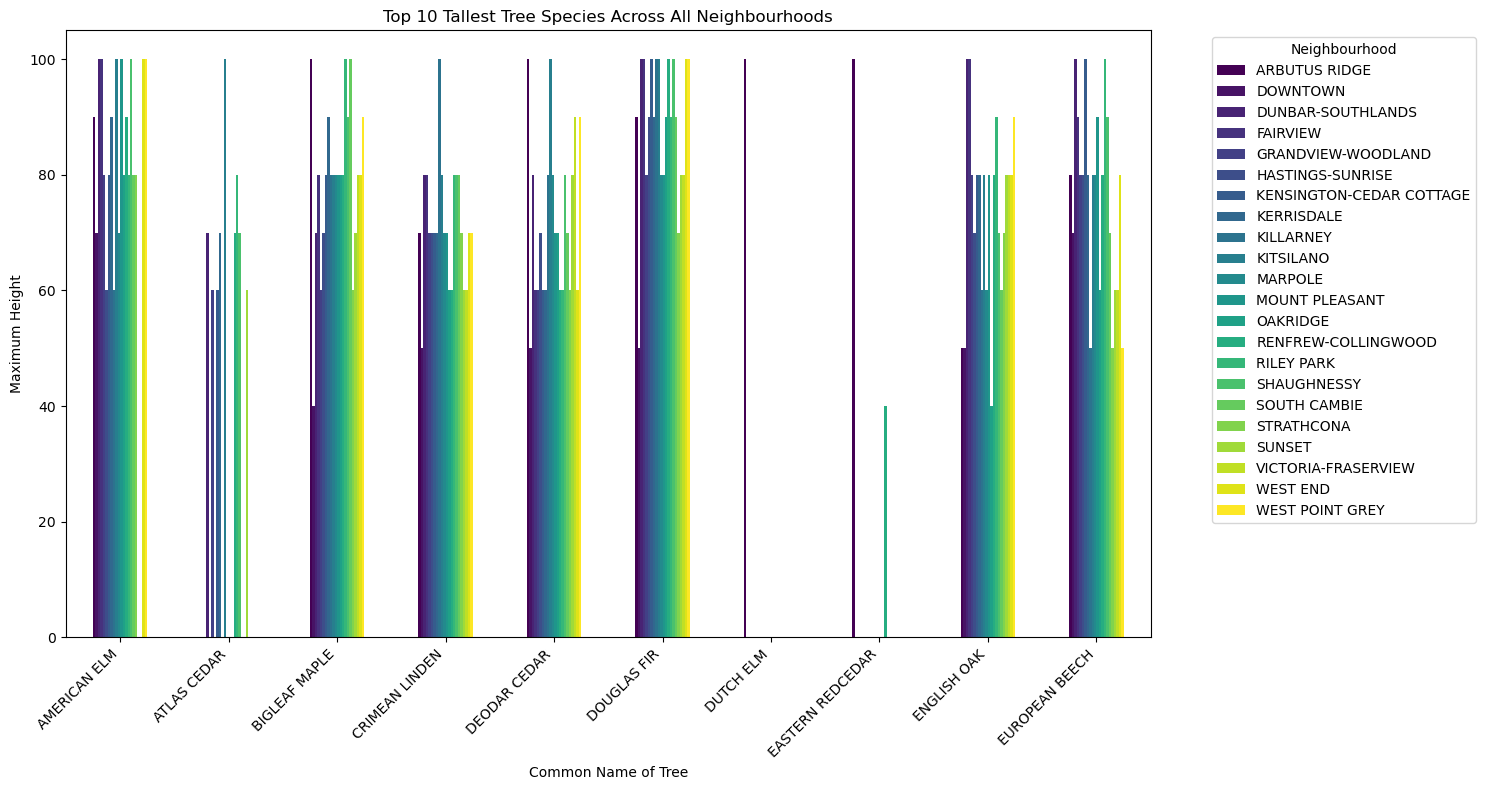

In [31]:
# Subset the DataFrame to include only the top 10 tallest trees
top10_df_2 = grouped_df_2[grouped_df_2['common_name'].isin(top10_tallest)]

# Pivot table for visualization
pivot_df_2 = top10_df_2.pivot(index='common_name', columns='neighbourhood_name', values='max_height').fillna(0)

# Visualize the data.
plt.figure(figsize=(15, 8))
pivot_df_2.plot(kind='bar', colormap='viridis', figsize=(15, 8))
plt.title('Top 10 Tallest Tree Species Across All Neighbourhoods')
plt.xlabel('Common Name of Tree')
plt.ylabel('Maximum Height')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Adding More Data:

Below we are adding more data by creating a simulated dataset. The simulated dataset will represent a guide to the care and characteristics of the species of trees found in Vancouver. We will create a selection of characteristics and assign them to each species of tree. 

Work done by: Nava, Owen, Myles

In [32]:
#Setting a seed for reproducibility
np.random.seed(90)
random.seed(90)

#Creating the possible values for all columns
bloom_time_options = ['Early Spring', 'Late Spring', 'Early Summer', 'Late Summer', 'Autumn']
fall_color_options = ['Yellow', 'Orange', 'Red', 'Brown', 'Does not change']
water_requirements_options = ['Low', 'Medium', 'High']
preferred_soil_type_options = ['Sandy', 'Clay', 'Well-drained']
pollinator_friendly_options = ['Yes', 'No', 'Yes'] #yes is written twice to increase the chances
carbon_sequestration_rate_range = (5, 200) # This will be used in the analysis 

common_names = df['common_name'].unique() 


In [33]:
# Assigning random data to each species of tree
random_data = {
    'common_name': common_names,
    'bloom_time': [random.choice(bloom_time_options) for i in common_names],
    'fall_colour': [random.choice(fall_color_options) for i in common_names],
    'water_requriements': [random.choice(water_requirements_options) for i in common_names],
    'soil_type': [random.choice(preferred_soil_type_options) for i in common_names],
    'pollinator_friendly': [random.choice(pollinator_friendly_options) for i in common_names],
    'carbon_sequestered_rate': [np.random.randint(carbon_sequestration_rate_range[0], carbon_sequestration_rate_range[1]) for i in common_names]
}


In [34]:
#Creating dataframe from generated data
tree_species = pd.DataFrame(random_data)

tree_species.head()

,common_name,bloom_time,fall_colour,water_requriements,soil_type,pollinator_friendly,carbon_sequestered_rate
0,LITTLE-LEAF LINDEN,Late Spring,Yellow,High,Clay,No,96
1,JAPANESE FLOWERING CHERRY,Early Spring,Brown,Medium,Sandy,Yes,162
2,CRIMEAN LINDEN,Late Summer,Does not change,Low,Sandy,No,119
3,UKON JAPANESE CHERRY,Autumn,Brown,High,Clay,Yes,164
4,BASSWOOD,Autumn,Does not change,Low,Well-drained,No,72


In [35]:
#inspecting the generated dataset
tree_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   common_name              684 non-null    object
 1   bloom_time               684 non-null    object
 2   fall_colour              684 non-null    object
 3   water_requriements       684 non-null    object
 4   soil_type                684 non-null    object
 5   pollinator_friendly      684 non-null    object
 6   carbon_sequestered_rate  684 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 37.5+ KB


In [36]:
df.head()

,genus_name,species_name,common_name,root_barrier,plant_area,on_street_block,neighbourhood_name,height_range,diameter,curb,date_planted,geom,latitude,longitude,max_height
0,TILIA,CORDATA,LITTLE-LEAF LINDEN,N,7,2100,GRANDVIEW-WOODLAND,50' - 60',17.5,Y,NaN,"{""coordinates"": [-123.061752, 49.265964], ""typ...",49.265964,-123.061752,60.0
1,PRUNUS,SERRULATA,JAPANESE FLOWERING CHERRY,N,7,2000,GRANDVIEW-WOODLAND,20' - 30',16.0,Y,NaN,"{""coordinates"": [-123.061873, 49.266295], ""typ...",49.266295,-123.061873,30.0
2,PRUNUS,SERRULATA,JAPANESE FLOWERING CHERRY,N,7,2000,GRANDVIEW-WOODLAND,30' - 40',27.0,Y,NaN,"{""coordinates"": [-123.061873, 49.266197], ""typ...",49.266197,-123.061873,40.0
3,PRUNUS,SERRULATA,JAPANESE FLOWERING CHERRY,N,7,2000,GRANDVIEW-WOODLAND,30' - 40',24.0,Y,NaN,"{""coordinates"": [-123.06188, 49.266075], ""type...",49.266075,-123.061880,40.0
4,TILIA,CORDATA,LITTLE-LEAF LINDEN,N,7,2100,GRANDVIEW-WOODLAND,60' - 70',18.0,Y,NaN,"{""coordinates"": [-123.061554, 49.265964], ""typ...",49.265964,-123.061554,70.0


In [37]:
#Now we will merge the datasets, joining them on their common column: 'common_name'
df_merged = df.merge(tree_species, on='common_name')

In [38]:
#verifying that the join was succesful
df_merged.head()

,genus_name,species_name,common_name,root_barrier,plant_area,on_street_block,neighbourhood_name,height_range,diameter,curb,date_planted,geom,latitude,longitude,max_height,bloom_time,fall_colour,water_requriements,soil_type,pollinator_friendly,carbon_sequestered_rate
0,TILIA,CORDATA,LITTLE-LEAF LINDEN,N,7,2100,GRANDVIEW-WOODLAND,50' - 60',17.5,Y,NaN,"{""coordinates"": [-123.061752, 49.265964], ""typ...",49.265964,-123.061752,60.0,Late Spring,Yellow,High,Clay,No,96
1,TILIA,CORDATA,LITTLE-LEAF LINDEN,N,7,2100,GRANDVIEW-WOODLAND,60' - 70',18.0,Y,NaN,"{""coordinates"": [-123.061554, 49.265964], ""typ...",49.265964,-123.061554,70.0,Late Spring,Yellow,High,Clay,No,96
2,TILIA,CORDATA,LITTLE-LEAF LINDEN,N,7,2100,GRANDVIEW-WOODLAND,60' - 70',18.5,Y,NaN,"{""coordinates"": [-123.061323, 49.265869], ""typ...",49.265869,-123.061323,70.0,Late Spring,Yellow,High,Clay,No,96
3,TILIA,CORDATA,LITTLE-LEAF LINDEN,N,7,2100,GRANDVIEW-WOODLAND,60' - 70',19.0,Y,NaN,"{""coordinates"": [-123.061101, 49.265864], ""typ...",49.265864,-123.061101,70.0,Late Spring,Yellow,High,Clay,No,96
4,TILIA,CORDATA,LITTLE-LEAF LINDEN,N,7,2100,GRANDVIEW-WOODLAND,40' - 50',13.0,Y,NaN,"{""coordinates"": [-123.060263, 49.265858], ""typ...",49.265858,-123.060263,50.0,Late Spring,Yellow,High,Clay,No,96


## Exploring the effects of a root barrier on two traits: diameter and carbon sequestration rate.

***Note:** The carbon sequestration rate comes from the simulated dataset, while the other two columns come from the original dataset*
 
Work done by: Nava, Owen, Myles

In [39]:
#select root barrier and group by diameter and sequestration rate, then describe data

grouped = df_merged.groupby('root_barrier')[['diameter', 'carbon_sequestered_rate']].describe()
grouped

diameter                                                     \
                 count       mean       std  min  25%    50%   75%    max   
root_barrier                                                                
N             143232.0  12.167750  9.382799  0.0  4.0  10.00  17.5  305.0   
Y               8720.0   5.503595  3.555319  0.5  3.0   4.25   7.0   86.0   

             carbon_sequestered_rate                                           \
                               count        mean        std  min   25%    50%   
root_barrier                                                                    
N                           143232.0  109.461985  55.450846  5.0  71.0  112.0   
Y                             8720.0  125.789679  56.903387  5.0  78.0  138.0   

                            
                75%    max  
root_barrier                
N             151.0  199.0  
Y             182.0  199.0

<Figure size 800x600 with 0 Axes>

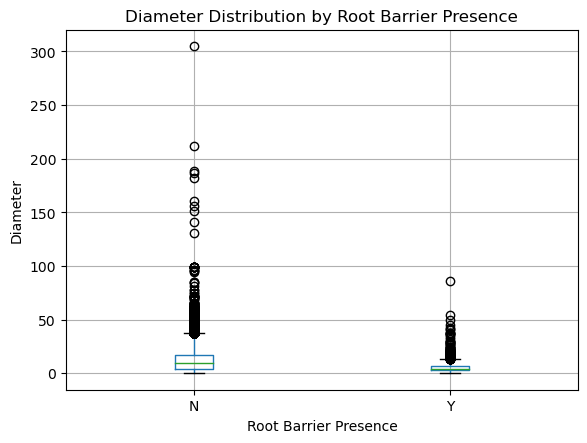

In [40]:
# Plotting the diameter against the root barrier

#create figure
plt.figure(figsize=(8, 6))

#create boxplot
df_merged.boxplot(column='diameter', by='root_barrier')

#adding titles
plt.title('Diameter Distribution by Root Barrier Presence')
plt.suptitle('')  

#adding labels
plt.xlabel('Root Barrier Presence')
plt.ylabel('Diameter')
plt.show()



By inspecting the boxplot we can see that the average size of a tree with a root barrier is significantly smaller than one without. While this difference in average size is small, the real difference can be observed when inspecting the outliers

Looking at the outliers, we can observe a seeming cutoff around a diameter of 50 where above, there are almost no more trees with a root barrier. Above a diameter of 50, there are many trees without a root barrier.

This shows that the size of trees is limited when a root barrier is present. The results make sense logically, as trees that are prevented from laying down deeper or wider roots cannot be expected to grow to the same size as trees that can grow unimpeded

<Figure size 800x600 with 0 Axes>

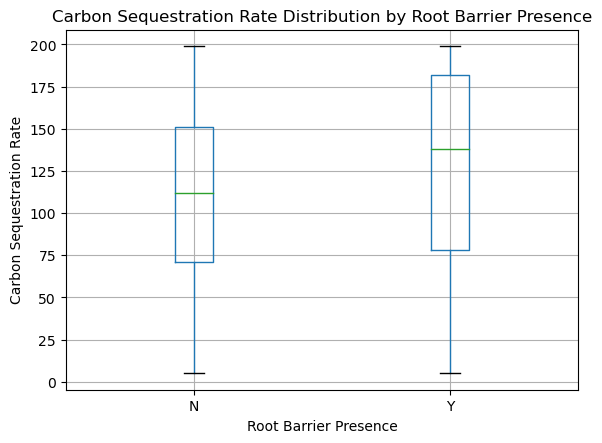

In [41]:
# Plotting carbon sequestration rate against root barrier presence

#create figure
plt.figure(figsize=(8, 6))

#create boxplot
df_merged.boxplot(column='carbon_sequestered_rate', by='root_barrier')

#adding titles
plt.title('Carbon Sequestration Rate Distribution by Root Barrier Presence')
plt.suptitle('')

#adding labels
plt.xlabel('Root Barrier Presence')
plt.ylabel('Carbon Sequestration Rate')
plt.show()


Examining this boxplot reveals that the presence of a root barrier has no effect on the rate of carbon sequestration. This makes sense, as the data for the carbon sequestration rate was manufactured and completely random. The carbon capture rate was set for each species of tree, with no consideration to individual specifics like size or age, or presence of a root barrier.

We expect that given real observational data, the presence of a root barrier would correlate negatively with the carbon sequestration rate, as larger trees can capture more carbon, and as we observed from the root diameter analysis, the size of trees with a root barrier is limited.

### Conclusion

Here we examined the top `10` trees within Vancouver. We added a simulated dataset to explore other factors like carbon sequestered rate against other known factors. 

We found Kwanza Flowering Cherry Trees are the most abundantly recorded in all of Vancouver with Renfrew Collingwood with the most and the most trees recorded generally! However you can look at the top trees amoung any of the neighbourhoods! 

Also, given that we have no root barrier, the diameter of the tree is often bigger. However we must conside that there might be other factors. Perhaps younger trees have root barriers and the data is updated later. 

Likewise, having a root barrier does not mean the carbon sequestered rate is any different. Likewise with the other data, we must consider that the data is fabricated and we do not know if that is true.